In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [3]:
emotions={
  '01':'anger',
  '02':'fear',
  '03':'neutral',
  '04':'sarcastic',
  '05':'disgust',
  '06':'happy',
  '07':'sad',
  '08':'surprise'
}

observed_emotions=['anger', 'fear','sarcastic','disgust','happy','sad','surprise']

In [4]:
def load_data(test_size):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\KHUSHI TALESRA\\Desktop\\7th sem\\DSML project\\IITKGP_SEHSC updated\\IITKGP_SEHSC\\session*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [6]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [7]:
print((x_train.shape[0], x_test.shape[0]))

(3150, 1050)


In [8]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [24]:
model=MLPClassifier(alpha=0.01, batch_size=256, activation='logistic', hidden_layer_sizes=(900,), learning_rate='adaptive', max_iter=1000, solver ='adam')

In [25]:
model.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.01, batch_size=256,
              hidden_layer_sizes=(900,), learning_rate='adaptive',
              max_iter=1000)

In [26]:
y_pred=model.predict(x_test)

In [27]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 81.52%


In [28]:
loss_values = model.loss_
print (loss_values)

0.05015863885328556


In [29]:
bestloss = model.best_loss_
print(bestloss)

0.047398709998271296


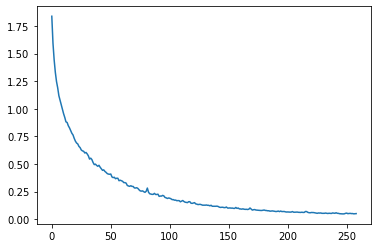

In [30]:
plt.plot(model.loss_curve_)

[[137   5   2   8   1   4   2]
 [  4 123   2   8   4  11   3]
 [  0   2 137   3  16   4   2]
 [  2   4   4 118   1  13   2]
 [  0   2   8  10 128   1   0]
 [  5   8   2  10   2 103   3]
 [  4   3   4   7   3  15 110]]


[Text(0, 0.5, 'anger'),
 Text(0, 1.5, 'disgust'),
 Text(0, 2.5, 'fear'),
 Text(0, 3.5, 'happy'),
 Text(0, 4.5, 'sad'),
 Text(0, 5.5, 'sarcastic'),
 Text(0, 6.5, 'surprise')]

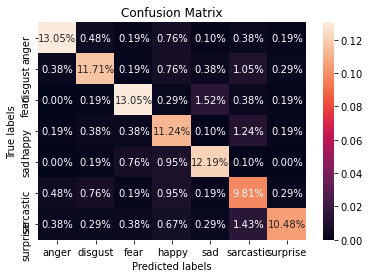

In [31]:
labels = ['anger','disgust','fear','happy','sad','sarcastic','surprise']
cf_matrix=confusion_matrix(y_pred, y_test,labels = labels)
print(cf_matrix)
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', ax =ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['anger','disgust','fear','happy','sad','sarcastic','surprise'])
ax.yaxis.set_ticklabels(['anger','disgust','fear','happy','sad','sarcastic','surprise'])

In [32]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       anger       0.90      0.86      0.88       159
     disgust       0.84      0.79      0.81       155
        fear       0.86      0.84      0.85       164
       happy       0.72      0.82      0.77       144
         sad       0.83      0.86      0.84       149
   sarcastic       0.68      0.77      0.73       133
    surprise       0.90      0.75      0.82       146

    accuracy                           0.82      1050
   macro avg       0.82      0.81      0.81      1050
weighted avg       0.82      0.82      0.82      1050



In [33]:
def extract_feature_real(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X, sample_rate = librosa.load(file_name)
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [83]:
#Testing with real life audio clips - anger,happy,sad
x,y_actual=[],[]
for file in glob.glob("C:\\Users\\KHUSHI TALESRA\\Desktop\\7th sem\\DSML project\\TestingAudio\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature_real(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y_actual.append(emotion)

In [84]:
y_predicted=model.predict(np.array(x))

In [85]:
y_actual

['anger', 'sarcastic', 'happy', 'sad']

In [86]:
y_predicted

array(['anger', 'surprise', 'sad', 'sad'], dtype='<U9')